# Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_pickle('mldataframe.pkl')

# Exploratory Data Analysis

## Number of Forecasts by SiteId

In [3]:
df_SiteId_Num_Forecasts = df.groupby(['SiteId'], as_index=False).agg({'ForecastId': lambda x: x.nunique()})

In [4]:
df_SiteId_Num_Forecasts.columns = ['SiteId', 'ForecastId_nunique']

In [5]:
df_SiteId_Num_Forecasts.head()

,SiteId,ForecastId_nunique
0,1,4
1,2,36
2,3,1
3,5,1
4,6,146


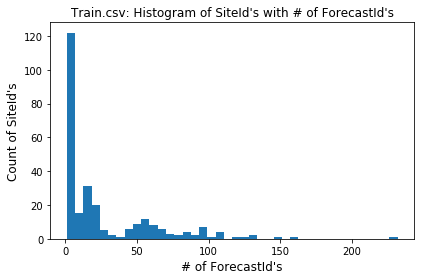

In [6]:
x = df_SiteId_Num_Forecasts['SiteId']
y = df_SiteId_Num_Forecasts['ForecastId_nunique']
fig = plt.figure(figsize=(6,4))
plt.hist(df_SiteId_Num_Forecasts['ForecastId_nunique'], bins=40)
plt.title("Train.csv: Histogram of SiteId's with # of ForecastId's", size=12)
plt.xlabel("# of ForecastId's", size=12)
plt.ylabel("Count of SiteId's", size=12)
plt.tight_layout();
fig.savefig('EDA_hist_Num_SiteIdswithForecastIds.png')

## Number of Forecasts by Submission Frequency

In [7]:
df_ForecastId_Num_Timestamps = df.groupby(['SiteId', 'ForecastId'], as_index=False).agg({'Timestamp': 'count'})

In [8]:
# Value_counts: Number of Timestamp Observations
df_Num_Forecasts_by_Frequency = pd.DataFrame(df_ForecastId_Num_Timestamps.Timestamp.value_counts())
df_Num_Forecasts_by_Frequency = df_Num_Forecasts_by_Frequency.reset_index()

In [9]:
df_Num_Forecasts_by_Frequency.columns = ['ForecastPeriodMin', 'Count']

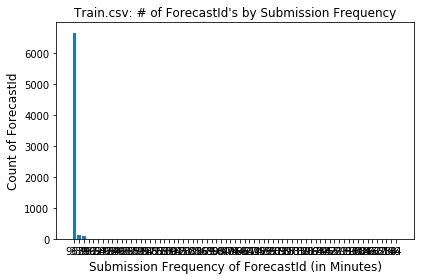

In [11]:
x = df_Num_Forecasts_by_Frequency['ForecastPeriodMin']
y = df_Num_Forecasts_by_Frequency['Count']
fig = plt.figure(figsize=(6,4))
plt.bar(range(len(y)),y)
plt.xticks(range(len(x)),x)
plt.title("Train.csv: # of ForecastId's by Submission Frequency", size=12)
plt.xlabel('Submission Frequency of ForecastId (in Minutes)', size=12)
plt.ylabel('Count of ForecastId', size=12)
plt.tight_layout();
fig.savefig('EDA_bar_Num_ForecastPeriodsbyFrequency.png')

## EDA TO DO ###
* Graph % of NaN per Forecast
* Graph data over time per Forecast (for a sample)

**TO DO**
* timeseries tutorial analytics vidhya
* start the presentation: create appendix EDA slides

**Today's Goals**
* Time Series as Index
* Fill NaN / Ignore in train data
* Understand train vs. submission time periods
    * Use Forecast values as inputs for future forecasts
* feature engineering for temp v. surface area v. ppl in building (stand in is vacation days)
* 
    